<a href="https://colab.research.google.com/github/amoghsawant17/EDA_Project_Amogh/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

####Introduction:
The Hotel Booking Analysis project aims to analyze a comprehensive dataset covering hotel bookings spanning from July 2015 to August 2017. By exploring this dataset, we seek to gain valuable insights into various aspects of hotel bookings, including booking patterns, customer preferences, seasonality, and other factors that influence the hotel industry. This project summary provides an overview of the dataset, the objectives of the analysis, and the key findings derived from the exploration.

####Dataset Overview:
The dataset used for this project comprises hotel booking data collected over a two-year period, from July 2015 to August 2017. It includes information about bookings made in two hotel types, with a focus on attributes such as customer demographics, booking details (e.g., dates, room types, meal plans), and hotel-specific information. The dataset also contains data regarding cancellations, enabling a comprehensive analysis of booking behavior.

####Objectives:
* Booking Patterns: Analyze booking patterns over time, including seasonality, trends, and demand fluctuations, to understand the factors that influence hotel reservations.

* Customer Segmentation: Segment customers based on various attributes such as demographics, booking behavior, and stay duration to identify distinct customer groups and their preferences.

* Booking Channels: Evaluate the impact of different booking channels (e.g., online travel agencies, direct bookings) on the hotel industry and identify the most popular and effective channels for hotel reservations.

* Cancellations: Investigate the reasons behind booking cancellations, and identify potential strategies to reduce these occurrences, thereby optimizing hotel revenue.

####Methodology:
* Data Cleaning: Preprocess the dataset by handling missing values, outliers, and inconsistencies to ensure data quality and reliability.

* Exploratory Data Analysis (EDA): Perform data wrangling, data visualization, and segmentation techniques to gain initial insights into the dataset and identify patterns, trends, and relationships.

#### Key Findings:
* Seasonal Patterns: Discovered the peak booking seasons and identified the factors contributing to fluctuations in demand, enabling hotels to optimize pricing and resource allocation.

* Customer Segmentation: Identified different customer segments based on demographics, booking behavior, and preferences, allowing hotels to tailor marketing strategies and services to specific customer groups.

* Booking Channels: Determined the most effective booking channels for hotels to evaluate their impact on revenue and customer satisfaction, enabling informed marketing decisions.

* Cancellations: Understood the underlying reasons for booking cancellations, enabling hotels to implement strategies to minimize these occurrences and optimize revenue.

####Conclusion:
The Hotel Booking Analysis project provides valuable insights into hotel booking patterns, customer preferences, and revenue optimization strategies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem is to analyze a hotel booking dataset from July 2015 to August 2017 and derive insights to address the following challenges:

* Booking Patterns and Seasonality: Identify seasonal trends, peak booking periods, and demand fluctuations to optimize resource allocation and pricing strategies.

* Customer Segmentation and Preferences: Segment customers based on demographics and booking behavior to personalize marketing campaigns and enhance customer satisfaction.

* Booking Channels and Revenue Analysis: Evaluate the effectiveness of booking channels and optimize distribution strategies to maximize revenue.

* Cancellations: Identify reasons behind cancellations and no-shows to minimize revenue losses and optimize occupancy rates.

#### **Define Your Business Objective?**


####Business Objective: Maximize revenue, enhance customer satisfaction, and optimize operations through data-driven insights derived from the analysis of hotel bookings dataset from July 2015 to August 2017.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

###Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

### Import Libraries


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/PYTHON_MODULE/EDA_Project/Hotel Bookings.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
pd.set_option ("display.max_columns", 40)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [10]:
missing_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
hotel                             0.000000
previous_cancellations            0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
previous_bookings_not_canceled    0.000000
is_repeated_guest                 0.000000
is_canceled                       0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal                              0.000000
babies                            0.000000
adults     

<Axes: >

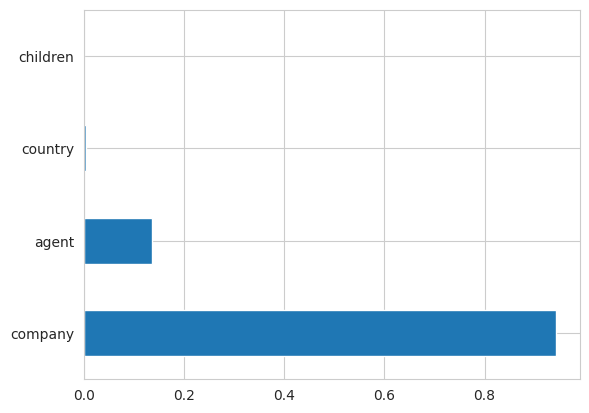

In [11]:
# Visualizing the missing values
missing_percentages[missing_percentages!=0].plot(kind='barh')

In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. In this dataset, all rows have 29 - 32 valid values and hence 0 - 3 missing values.

### What did you know about your dataset?

In [12]:
df.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                5428         5428       5428   
                   2017                5661         5661       5661   
August             2015                3889         3889       3889   
                   2016                5063         5063       5063   
                   2017                4925         4925       4925   
December           2015                2920         2920       2920   
                   2016                3860         3860       3860   
February           2016                3891         3891       3891   
                   2017                4177         4177       4177   
January            2016                2248         2248       2248   
                   2017                3681         3681       3681   
July               2015                2776         2776       2776   
                   2016                4572         4572       4572   
                   2017                5313         5313       5313   
June               2016                5292         5292       5292   
                   2017                5647         5647       5647   
March              2016                4824         4824       4824   
                   2017                4970         4970       4970   
May                2016                5478         5478       5478   
                   2017                6313         6313       6313   
November           2015                2340         2340       2340   
                   2016                4454         4454       4454   
October            2015                4957         4957       4957   
                   2016                6203         6203       6203   
September          2015                5114         5114       5114   
                   2016                5394         5394       5394   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   5428   
                   2017                                   5661   
August             2015                                   3889   
                   2016                                   5063   
                   2017                                   4925   
December           2015                                   2920   
                   2016                                   3860   
February           2016                                   3891   
                   2017                                   4177   
January            2016                                   2248   
                   2017                                   3681   
July               2015                                   2776   
                   2016                                   4572   
                   2017                                   5313   
June               2016                                   5292   
                   2017                                   5647   
March              2016                                   4824   
                   2017                                   4970   
May                2016                                   5478   
                   2017                                   6313   
November           2015                                   2340   
                   2016                                   4454   
October            2015                                   4957   
                   2016                                   6203   
September          2015                                   5114   
                   2016                                   5394   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    5428   

### Duration of this dataset is between July, 2015 & August, 2017. Data available for July  & August for consecutive three years.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

* **Hotel:** H1=Resort Hotel;  H2=City Hotel
* **Is_cancelled:** If the booking was cancelled(1) or not(0)
* **lead_time:** Number of days that elapsed between the entering date of the booking into PMS and the arrival date
* **arrival_date_year:** Year of arrival date
* **arrival_date_month:** Month of arrival date
* **arrival_date_week_number:** Week number of arrival date
* **arrival_dat_day:** Day of arrival date
* **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_weekday_nights:** Number of weekend nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults:** Number of adults
* **children:** Number of children
* **babies:** Number of babies
* **meal:** Kind of meal opted for
* **country:** Country code
* **market_segment:** Which segment the customer belongs to stay-corporate booking/Direct/TA/TO
* **Distribution_channel:** How the customer accessed the stay-corporate booking/Direct/TA/TO
* **is_repeated_guest:** Guest coming for first time or not
* **previous_cancellation:** Was there a cancellation before
* **previous_bookings:** Count of previous bookings
* **reserved_room_type:** Type of room reserved
* **assigned_room_type:** Type of room assigned
* **booking_changes:** Count of changes made to booking
* **deposit_type:** Deposit type
* **agent:** Booked through agent
* **days_in_waiting_list:** Number of days in waiting list
* **Customer_type:** Type of customer
* **required_car_parking:** If car parking is required
* **total_of_special_req:** Number of additional special requirements
* **reservation_status:** Reservation status
* **reservation_status_date:** Date of the specific status



### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

In [16]:
# Changing datatype of "children" from (float) to (int) and filling (0) incase of null values
df['children'].fillna(0,inplace=True)
df['children'] = df['children'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


###Eliminating some columns which are not relevant for our analysis

In [19]:
df_New_Columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [101]:
# Creating copy of our original dataset
df_new = df[df_New_Columns].copy()

In [102]:
# Creating one column for 'Total_Guests'
df_new['Total_Guests'] = df_new['adults'] + df_new['children']

In [103]:
# Dropping 'adults' & 'children' columns
df_new = df_new.drop(['adults', 'children'], axis=1)

In [104]:
# Removing rows containing zero 'Total_Guests'
df_new= df_new[df_new.Total_Guests > 0]

In [105]:
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,No Deposit,Transient,75.0,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,No Deposit,Transient,75.0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,Transient,98.0,0,1,2


In [25]:
# Hotel Bookings in a year
first = df_new[df_new.arrival_date_year == 2015]
second = df_new[df_new.arrival_date_year == 2016]
third = df_new[df_new.arrival_date_year == 2017]

In [26]:
# Hotel Bookings for 2015
f = first.arrival_date_year.count()
f

21967

In [27]:
# Hotel Bookings for 2016
s = second.arrival_date_year.count()
s

56623

In [28]:
# Hotel Bookings for 2017
t = third.arrival_date_year.count()
t

40620

In [29]:
# Booking Cancellations in a year
first_c = df_new[(df_new.arrival_date_year == 2015) & (df_new.is_canceled == 1)]
second_c = df_new[(df_new.arrival_date_year == 2016) & (df_new.is_canceled == 1)]
third_c = df_new[(df_new.arrival_date_year == 2017) & (df_new.is_canceled == 1)]

In [30]:
# Booking Cancellations in 2015
f_c = first_c.is_canceled.count()
f_c

8141

In [31]:
# Booking Cancellations in 2016
s_c = second_c.is_canceled.count()
s_c

20324

In [32]:
# Booking Cancellations in 2017
t_c = third_c.is_canceled.count()
t_c

15734

In [33]:
# Percentages of booking Cancellations over the years
print("Percentage of booking Cancellations in 2015: ", (f_c / f)*100)
print("Percentage of booking Cancellations in 2016: ", (s_c / s)*100)
print("Percentage of booking Cancellations in 2017: ", (t_c / t)*100)

Percentage of booking Cancellations in 2015:  37.06013565803251
Percentage of booking Cancellations in 2016:  35.89354149373929
Percentage of booking Cancellations in 2017:  38.734613490891185


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

###Hotel wise Yearly Bookings

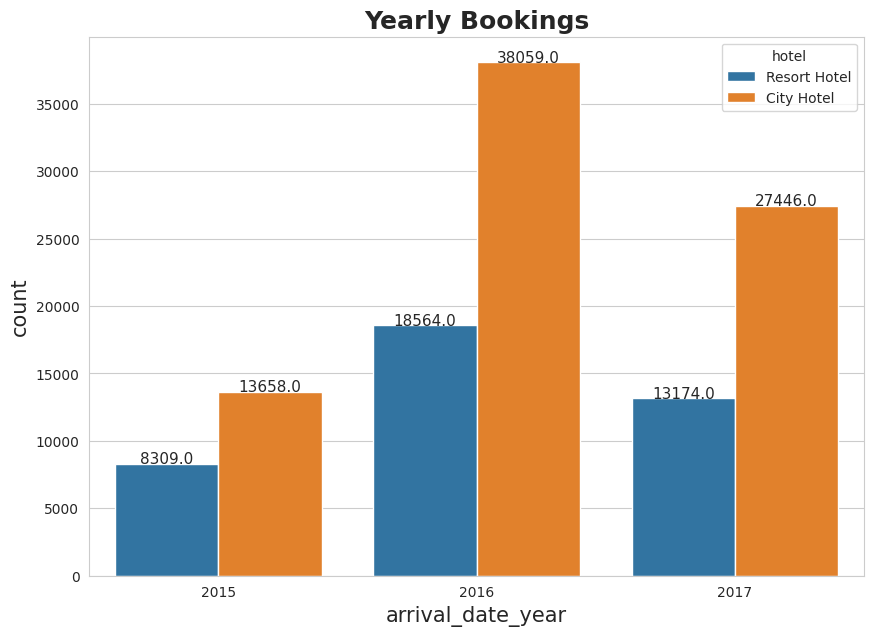

In [34]:
# Chart - 1 visualization code
ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'arrival_date_year', data=df_new, hue='hotel')
ax.set_title('Yearly Bookings',fontsize = 18, fontweight='bold')
ax.set_xlabel('arrival_date_year', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

##### 1. Why did you pick the specific chart?

- Barplots gives flexibility & clarity of information. It is very using while comparing 'Yearly Bookings' among two hotels over the years.

##### 2. What is/are the insight(s) found from the chart?

- City hotel is having higher number of bookings compared to Resort hotel.
- In 2015, City hotel is having 24% more bookings than Resort hotel.
- In 2016, City hotel is having 34% more bookings than Resort hotel.
- In 2017, City hotel is having 35% more bookings than Resort hotel.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We have to allocate more resources towards City Hotel compared to Resort Hotel.
-  To catch up with City hotel, we need to focus on ways to increase our bookings at Resort Hotel.

#### Chart - 2

###Countrywise Guests

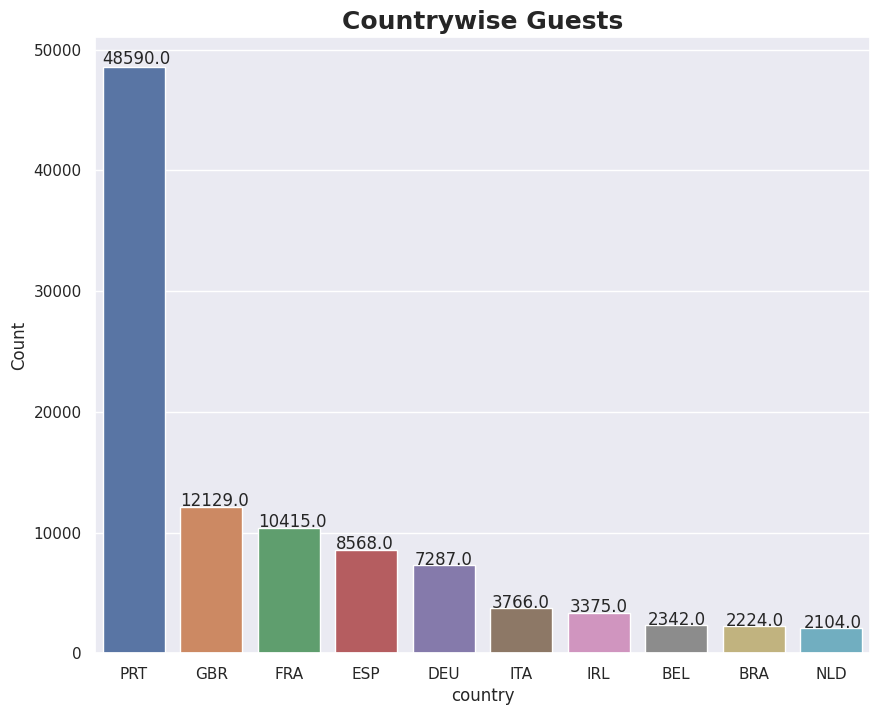

In [35]:
# Chart - 2 visualization code
# import data
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,8)})

# plot barplot
a = sns.barplot(x = list(df.country.value_counts().head(10).index) , y =list(df.country.value_counts().head (10)), data = df_new)

# add label to the axis and label to the plot
a.set(xlabel ="country", ylabel = "Count")
a.set_title('Countrywise Guests', fontsize = 18, fontweight='bold')

for p in a.patches:
    a.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### 1. Why did you pick the specific chart?

- Country wise segregation can be well analysed using barplot here.

##### 2. What is/are the insight(s) found from the chart?

- Number of guests coming from Portugal is highest among Top 5 countries followed by Britain, France, Spain & Germany.
- As number of guests from Portugal are highest, we can offer customer specific servies based on their customs & traditions during their stay.
- We can appoint translators for our guests coming from top 5 countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can diversify our customer base among Top 10 countries to avoid dependence from a particular country. This can be done using country specific marketing campaigns & advertisements.

#### Chart - 3

###Booking Cancellations by hotel types


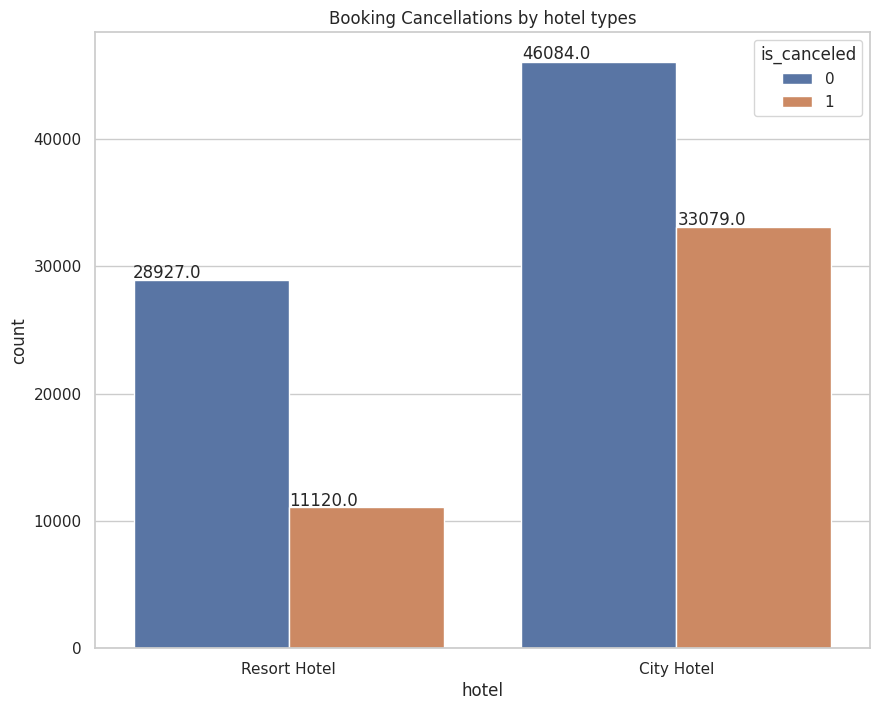

In [36]:
# Chart - 3 visualization code
sns.set(style = "whitegrid")
plt.title("Booking Cancellations by hotel types")
a = sns.countplot(x = "hotel", hue = 'is_canceled', data = df_new)
for p in a.patches:
    a.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### 1. Why did you pick the specific chart?

- Barplots are really helpful in comparing two hotel types over the years. It gives clear idea about Total bookings & Cancellations out of those bookings.

##### 2. What is/are the insight(s) found from the chart?

- Booking Cancellations in Resort hotel, is around 27% out of total bookings & in City hotel, is around 41% out of total bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- City hotel are having 21,959 number of cancellations more than Resort hotel.

#### Chart - 4

###Monthwise Bookings & Monthwise Booking Cancellations

In [37]:
df_new_copy= df_new.copy()
df_new_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,No Deposit,Transient,75.0,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,No Deposit,Transient,75.0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,Transient,98.0,0,1,2


In [38]:
# Merge the three columns into a single column named 'merged_column'
df_new_copy['Date'] = df_new_copy[['arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

# Print the updated DataFrame
df_new_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests,Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2,1-July-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2,1-July-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,No Deposit,Transient,75.0,0,0,1,1-July-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,No Deposit,Transient,75.0,0,0,1,1-July-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,Transient,98.0,0,1,2,1-July-2015


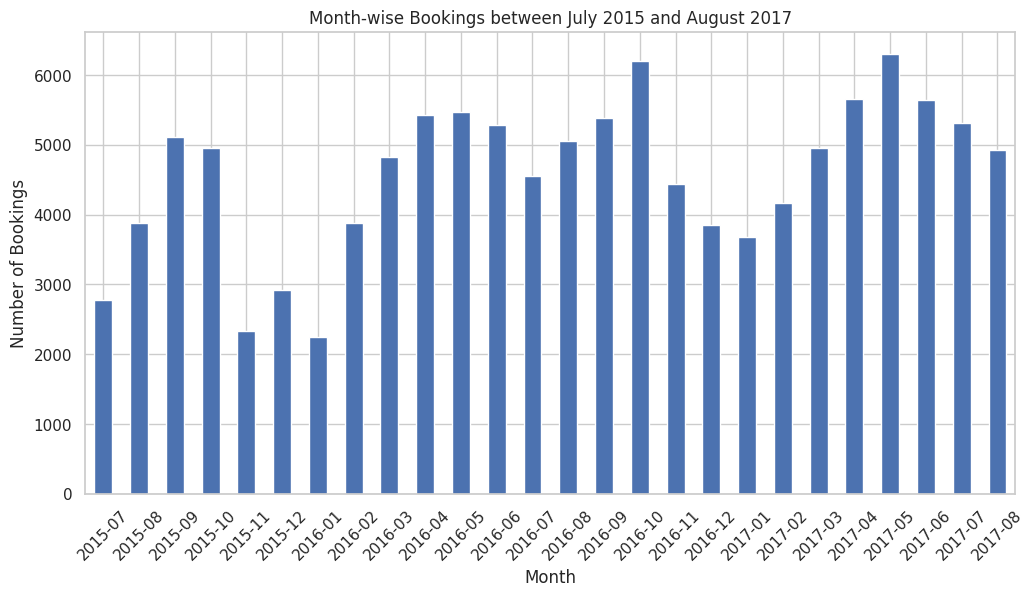

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'arrival_date' column to datetime format
df_new_copy['arrival_date'] = pd.to_datetime(df_new_copy['Date'])

# Filter data for July 2015 to August 2017
start_date = pd.to_datetime('2015-07-01')
end_date = pd.to_datetime('2017-08-31')
filtered_df = df_new_copy[(df_new_copy['arrival_date'] >= start_date) & (df_new_copy['arrival_date'] <= end_date)]

# Group data by month and calculate count of bookings
monthwise_bookings = filtered_df.groupby(filtered_df['arrival_date'].dt.to_period('M')).size()

# Plot month-wise bookings
plt.figure(figsize=(12, 6))
monthwise_bookings.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Month-wise Bookings between July 2015 and August 2017')
plt.xticks(rotation=45)
plt.show()


In [40]:
df_new_copy.is_canceled.unique()

array([0, 1])

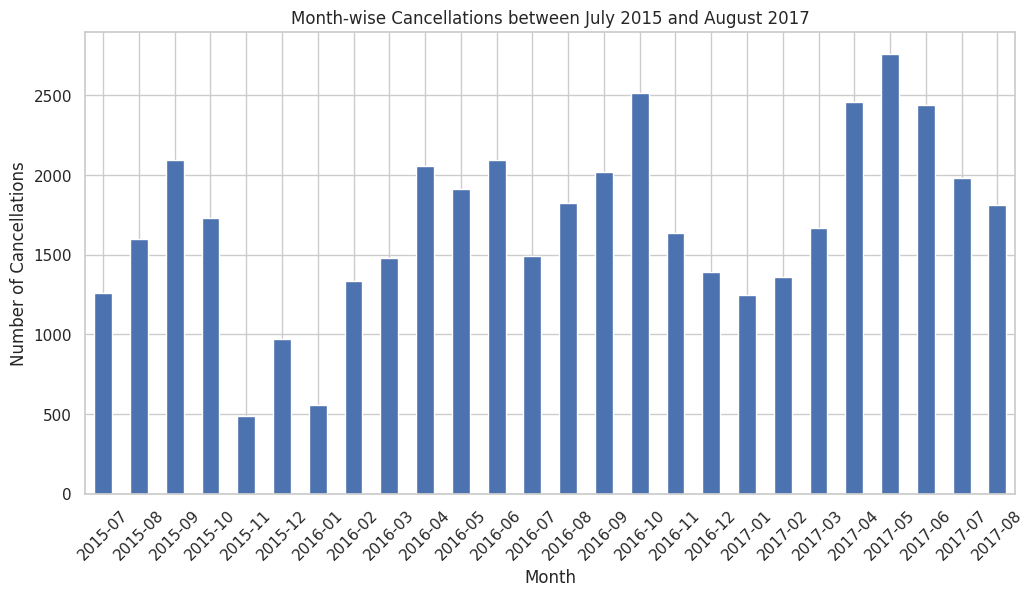

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'arrival_date' column to datetime format
df_new_copy['arrival_date'] = pd.to_datetime(df_new_copy['Date'])

# Filter data for July 2015 to August 2017 and cancellations
start_date = pd.to_datetime('2015-07-01')
end_date = pd.to_datetime('2017-08-31')
filtered_df = df_new_copy[(df_new_copy['arrival_date'] >= start_date) & (df_new_copy['arrival_date'] <= end_date) & (df_new_copy['is_canceled'] == 1)]

# Group data by month and calculate count of cancellations
monthwise_cancellations = filtered_df.groupby(filtered_df['arrival_date'].dt.to_period('M')).size()

# Plot month-wise cancellations
plt.figure(figsize=(12, 6))
monthwise_cancellations.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Month-wise Cancellations between July 2015 and August 2017')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

- With the help of Bar plots we can see trends or patterns in bookings & cancellations over the years.

##### 2. What is/are the insight(s) found from the chart?

- In November to February season, Bookings & cancellations are lower compared to other months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- As particular period of the year is showing less growth in Bookings, so in this period we can regulate hotel expenses & better utilise our resources.

#### Chart - 5

###Market Segment wise Hotel bookings

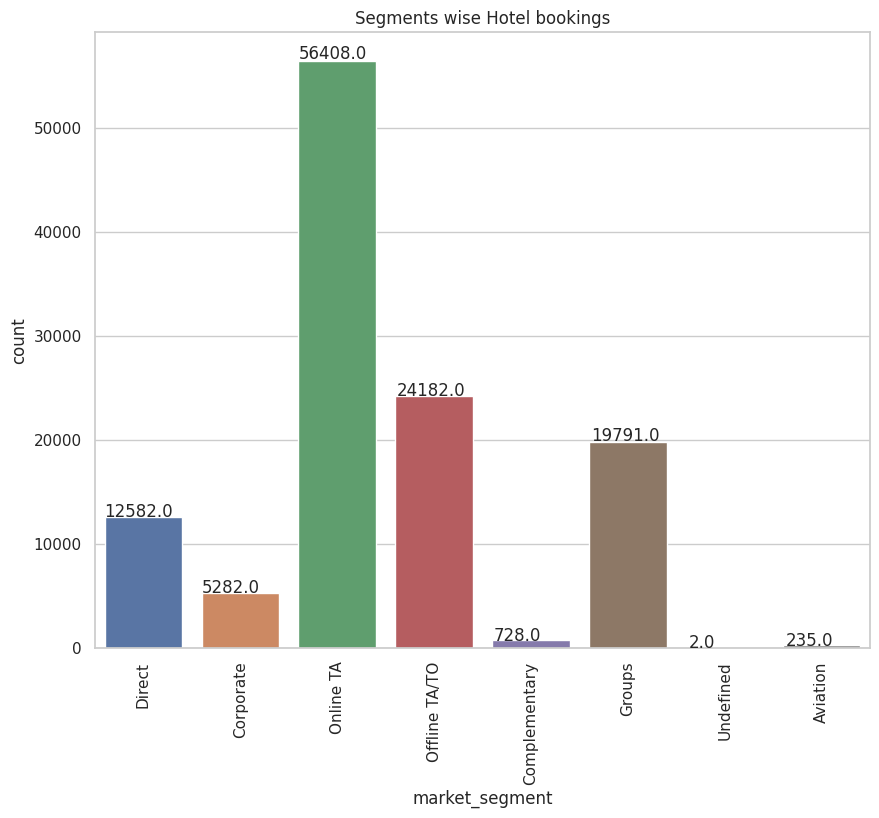

In [42]:
# Chart - 5 visualization code
# Market Segment wise Hotel bookings
plt.title("Segments wise Hotel bookings")
ax = sns.countplot(x = "market_segment", data = df_new)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

- In this case, Barplot provides a clear representation of the data, allowing us to communicate your findings effectively.

##### 2. What is/are the insight(s) found from the chart?

- Through Online Travel agents most of the hotel bookings are done followed by Offline TA/TO & Group bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can incentivise our Online travel agents as per our business growth & offer competitive pricings to our customers.
- We can improve our online presence so that we can get more bookings through Direct category.

#### Chart - 6

###Relationship between Market segments and Cancellations

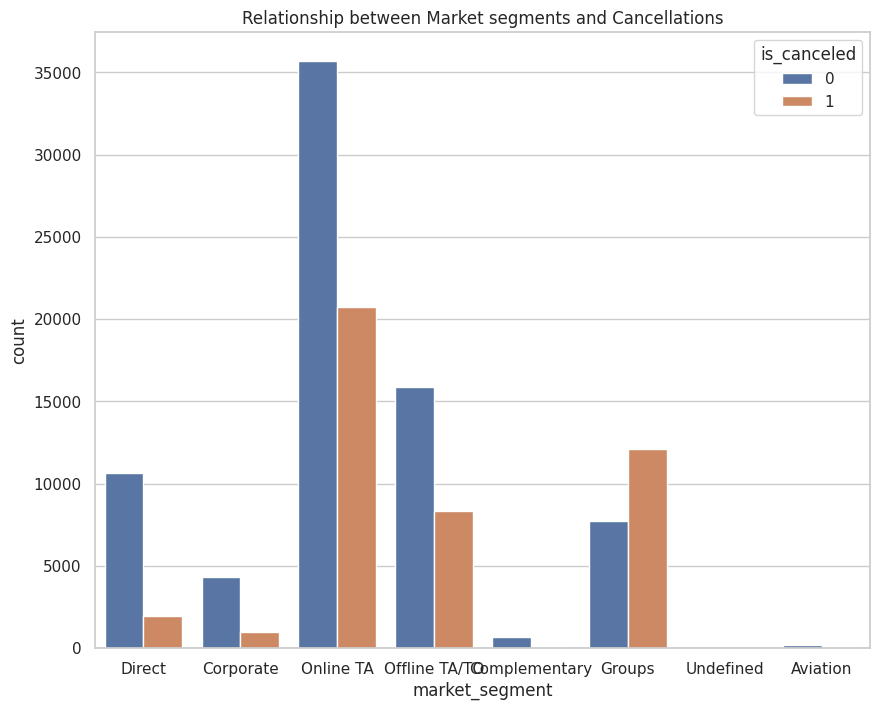

In [43]:
# Chart - 6 visualization code
# Relationship between Market segments and Cancellations
plt.title("Relationship between Market segments and Cancellations")
sns.countplot(x='market_segment',data=df_new ,hue='is_canceled')
figsize=(15, 10)

##### 1. Why did you pick the specific chart?

- By grouping bars or using stacked bars, we can visualize the distribution of multiple categories within each group or compare the values of different variables side by side.

##### 2. What is/are the insight(s) found from the chart?

- We can see that Customers booking directly is having huge potential for our revenue growth as Direct bookings are showing far less cancellations compared to others. Around 16% of Direct bookings gets cancelled.
- Around 35% bookings made through Online TA gets cancelled.
- Around 33% bookings made through Offline TA/TO gets cancelled.
- Around 60% of Group bookings gets cancelled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Group bookings

#### Chart - 7

###Hotel Bookings by Customer Type

In [44]:
df_new.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

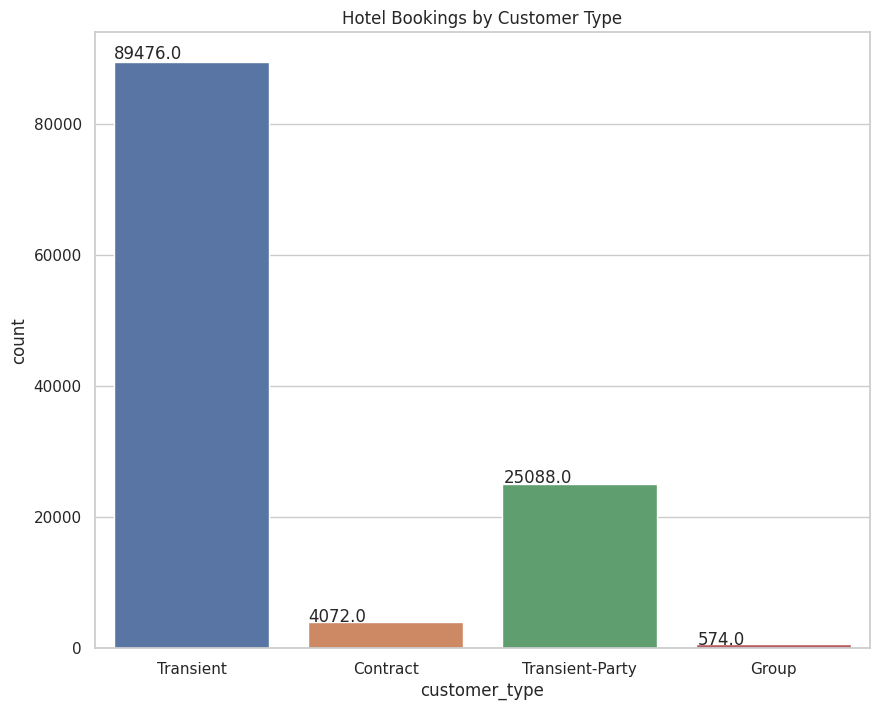

In [45]:
# Chart - 7 visualization code
# Hotel Bookings by Customer Type
plt.title("Hotel Bookings by Customer Type")
ax = sns.countplot(x = "customer_type", data = df_new)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

- Bar plots present data in a clear and concise manner, making it easy to understand and interpret.

##### 2. What is/are the insight(s) found from the chart?

- Around 75% of customers are Transient & 21% of customers are Transient-Party.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Our dependence on these two customer type are very high. We need to diversify our cutomer base.

#### Chart - 8

### Relationship between lead time and cancellations

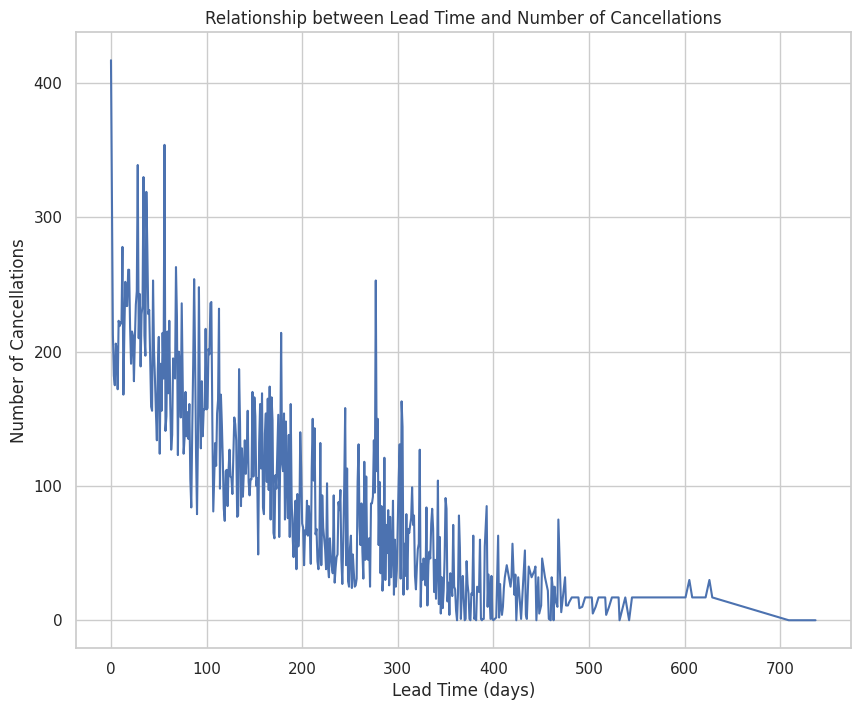

In [76]:
# Relationship between lead time and cancellations
cancellations = df_new[df_new['is_canceled'].isin([0, 1])]
cancellations_count = cancellations.groupby('lead_time')['is_canceled'].sum().reset_index(name='cancellations')
plt.plot(cancellations_count['lead_time'], cancellations_count['cancellations'])
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Cancellations')
plt.title('Relationship between Lead Time and Number of Cancellations')
plt.show()


##### 1. Why did you pick the specific chart?

 - Line plots are particularly effective in visualizing trends and patterns in data. By connecting data points with lines, you can easily observe the overall direction and magnitude of changes over time or across different variables.

##### 2. What is/are the insight(s) found from the chart?

- Less number of lead time days are more prone towards higher cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Instead of cancellations we can think of giving our customers option of rescheduling during our off-season period.

#### Chart - 9

###Relationship between Deposit type and Cancellations

In [48]:
# Chart - 8 visualization code
# Various columns under deposits
df_new.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

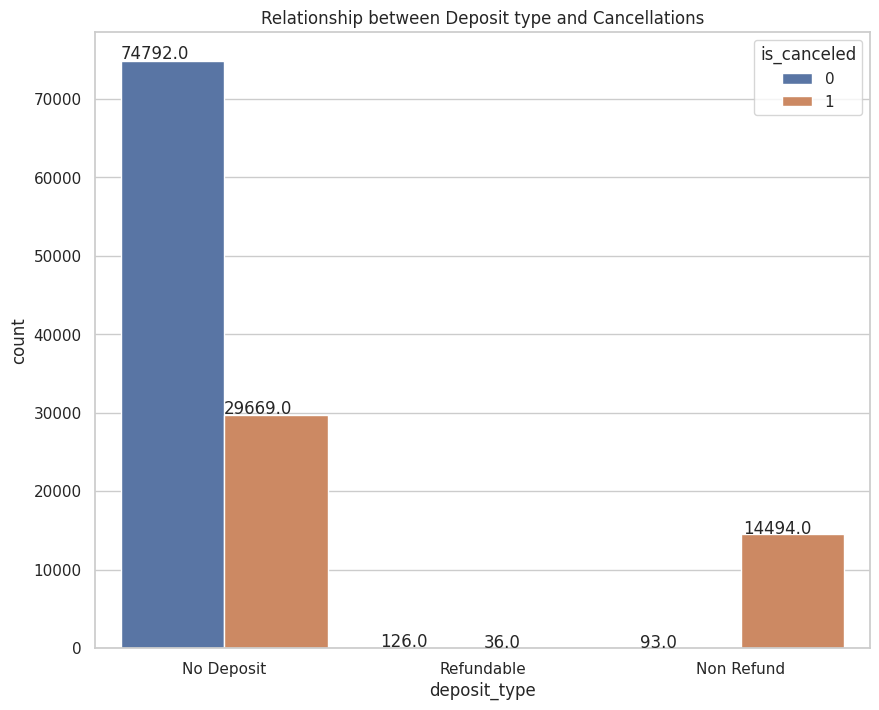

In [49]:
# Relationship between Deposit type and Cancellations
plt.title("Relationship between Deposit type and Cancellations")
ax = sns.countplot(x='deposit_type',data=df_new ,hue='is_canceled')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [78]:
df_new.shape

(119210, 26)

##### 1. Why did you pick the specific chart?

- Pandas' bar plots seamlessly integrate with other pandas functionalities. You can use them in conjunction with filtering, grouping, and aggregating operations, enabling you to explore and visualize subsets of your data effectively.

##### 2. What is/are the insight(s) found from the chart?

- 28% of No deposit type bookings are prone to cancellations.
- Almost All Non refund type bookings gets cancelled.
- Refundable deposit type bookings cancellations seems negligible in numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- It is curious to know that despite No refund customers cancelled their bookings in Non refund type.
- Hotel must stop taking bookings without deposits.

#### Chart - 10

###Relationship between Previous Cancellations and Cancellations

In [50]:
# Chart - 10 visualization code
df_new.previous_cancellations.unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [51]:
df_new.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
previous_cancellations,,,,,,,,,,,,,,,,,,,,,,,
0,112731,112731,112731,112731,112731,112731,112731,112731,112731,112731,112290,112731,112731,112731,112731,112731,112731,112731,112731,112731,112731,112731,112731
1,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,6014,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048
2,114,114,114,114,114,114,114,114,114,114,111,114,114,114,114,114,114,114,114,114,114,114,114
3,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
4,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
5,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
6,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
11,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
13,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


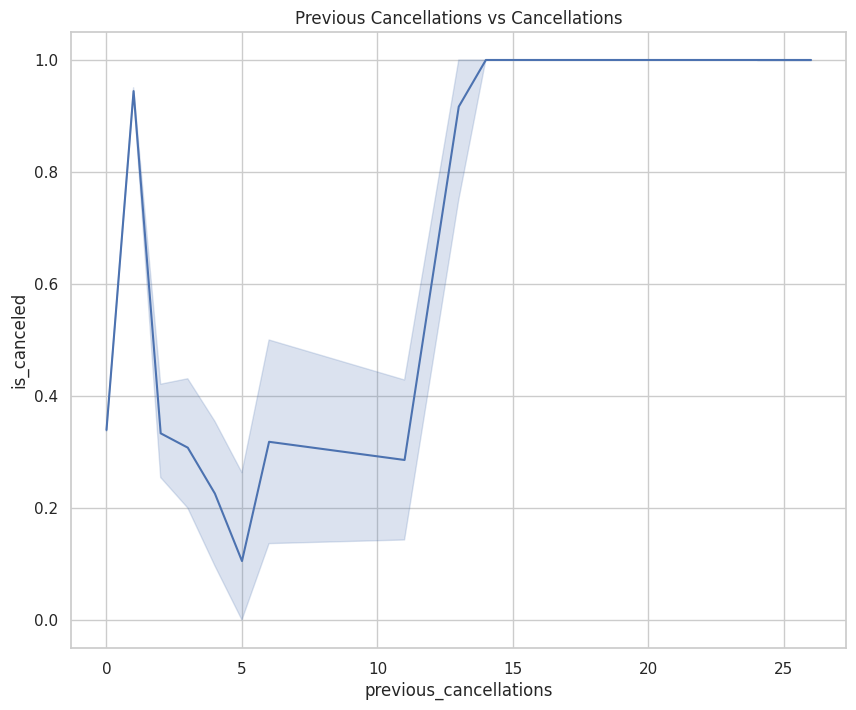

In [52]:
plt.title ('Previous Cancellations vs Cancellations')
ax = sns.lineplot(x= 'previous_cancellations' ,y = "is_canceled", data = df_new)

##### 1. Why did you pick the specific chart?

-  Line plots provide a clear and intuitive representation of how data changes over time.

##### 2. What is/are the insight(s) found from the chart?

- Customers who have cancelled their bookings previously are more prone towards cancellations next time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Customers with previous cancellation history must be penalised accordingly & should be allowed bookings only in off season.

#### Chart - 11

###Monthly Average booking price over the years

In [53]:
a = df_new.adr.unique()

In [54]:
# Chart - 11 visualization code
df_new['adr_pp']= df_new.adr/df_new.Total_Guests
monthlyadr_df= df_new.groupby (['hotel','arrival_date_month'])['adr_pp'].mean()
monthlyadr_df=pd.DataFrame({"hotel":(map(lambda x:x[0],monthlyadr_df.index)), "month": list(map(lambda x:x[1],monthlyadr_df.index)), "mean": monthlyadr_df.values})
monthlyadr_df

,hotel,month,mean
0,City Hotel,April,58.714542
1,City Hotel,August,55.300998
2,City Hotel,December,48.578168
3,City Hotel,February,49.172672
4,City Hotel,January,50.800087
5,City Hotel,July,54.834401
6,City Hotel,June,67.899081
7,City Hotel,March,52.362169
8,City Hotel,May,71.068304
9,City Hotel,November,56.982024


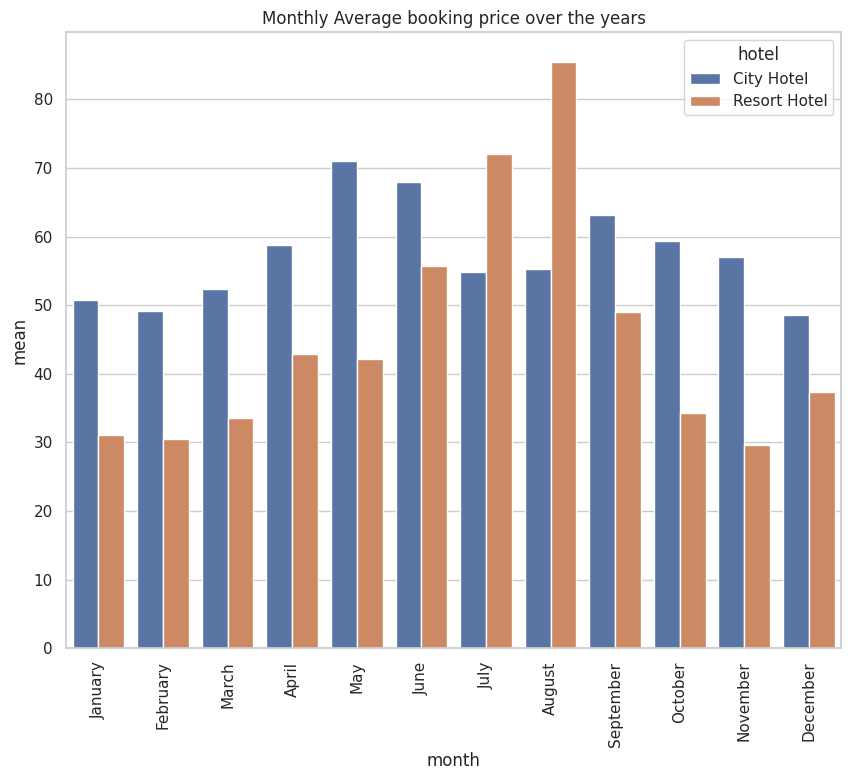

In [55]:
plt.title ('Monthly Average booking price over the years')
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot (y= 'mean', x= 'month', data= monthlyadr_df, hue= 'hotel', order= month_sorted)
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

- We can see clear segregation between Monthly Average booking price over different months in a year.

##### 2. What is/are the insight(s) found from the chart?

- June to September period is an important season for City hotel & May to October period is an important season for Resort hotel.
- August is having a peak of average booking price in case of City hotel while May is having a peak of Monthly average booking price in case of Resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- January, February & November month is having Monthly average booking price (30) in City hotel which is very less compared to Resort hotel.  

#### Chart - 12

###Relationship between adr_pp with Room type

<Axes: title={'center': 'Relationship between adr_pp with reserved_room_type'}, xlabel='reserved_room_type', ylabel='adr_pp'>

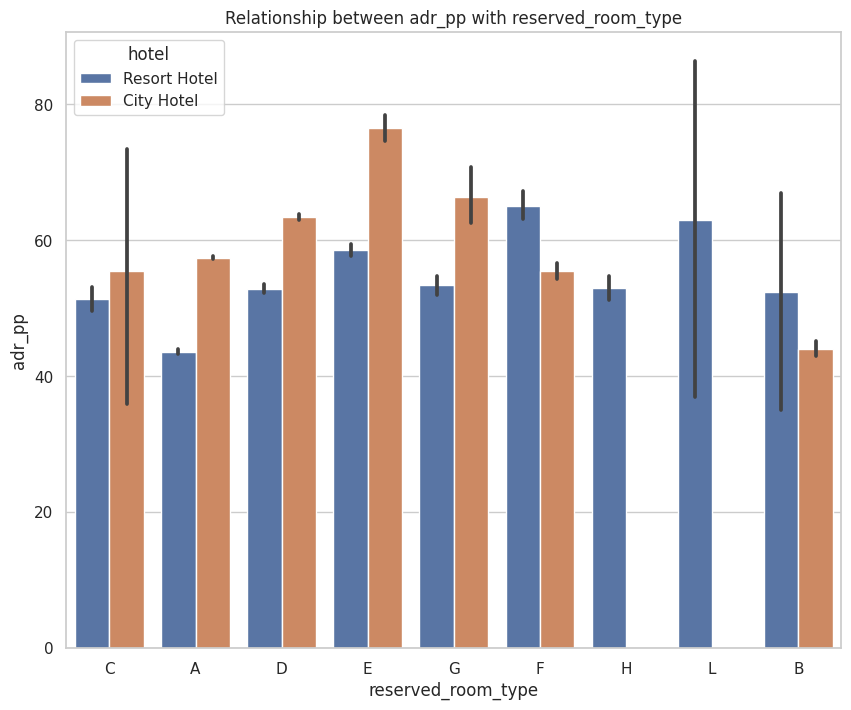

In [56]:
# Chart - 12 visualization code
# Relationship between adr_pp with Room type
plt.title ('Relationship between adr_pp with reserved_room_type')
sns.barplot(data = df_new, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')

##### 1. Why did you pick the specific chart?

- We can see clear segregation between different reserved_room_type with hotel type & its relationship with adr_pp

##### 2. What is/are the insight(s) found from the chart?

- Customers with highest adr_pp more likely to reserved 'E' room type in City hotel while Customers with highest adr_pp more likely to reserved 'F' room type in Resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Room types 'H' & 'L' in City hotel least likely to have any customer so we can convert this room type into 'E' & 'G' type.

#### Chart - 13

###Relationship between adr_pp with Meal type

<Axes: title={'center': 'Relationship between adr_pp with Meal type'}, xlabel='meal', ylabel='adr_pp'>

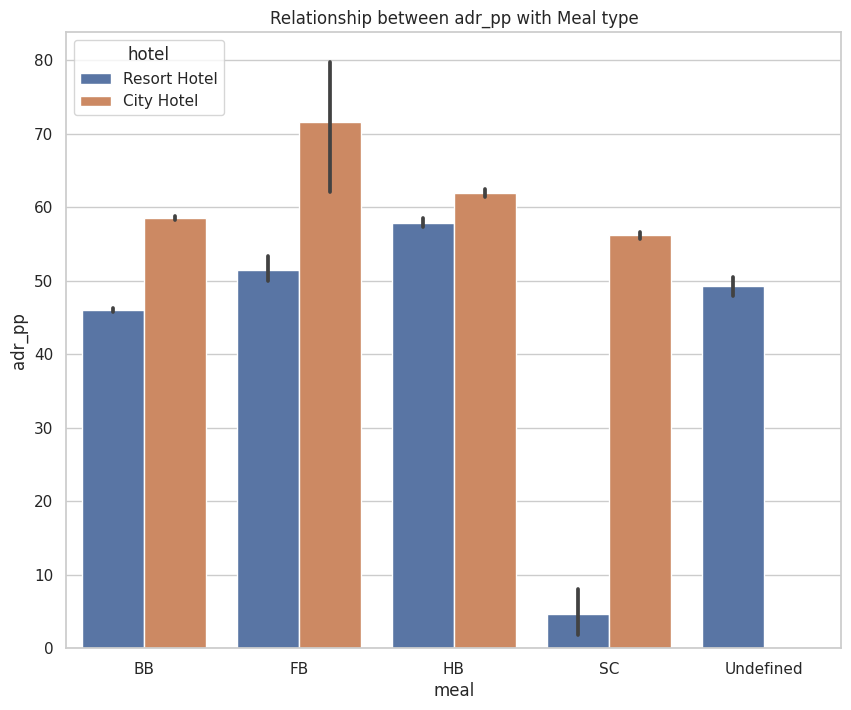

In [57]:
# Chart - 13 visualization code
# Relationship between adr_pp with Meal type
plt.title ('Relationship between adr_pp with Meal type')
sns.barplot(data = df_new, x = 'meal', y = 'adr_pp', hue = 'hotel')


##### 1. Why did you pick the specific chart?

- We can see clear segregation between different meal types with hotel type & its relationship with adr_pp

##### 2. What is/are the insight(s) found from the chart?

- Customers with highest adr_pp in the City hotel mostly order FB Meal type and Customers with lowest adr_pp in the Resort hotel order SC Meal type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- City hotel can add more varieties in FB Meal type while Resort hotel can remove SC Meal type from their menus because it's having less popularity among customers.

#### Chart - 14

###Relationship between Customer & services offered by hotels

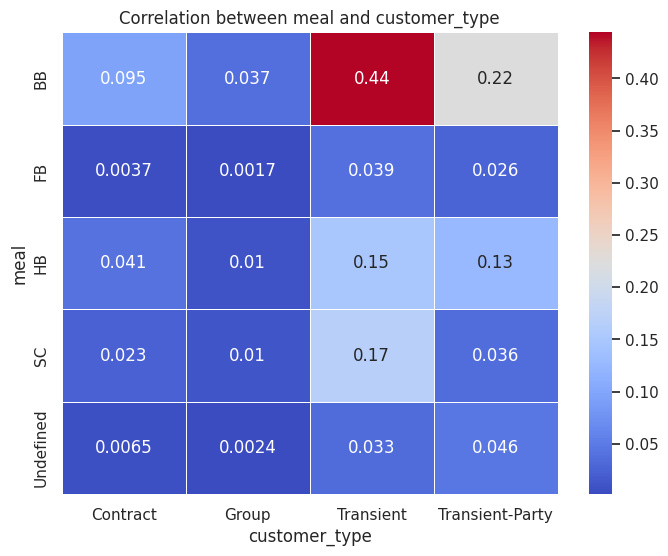

In [58]:
# Correlation between meal and customer_type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df['meal'], df['customer_type'])


# Calculate the correlation (Cramer's V) between the variables
n = contingency_table.sum().sum()
phi_corr = contingency_table.apply(lambda x: x / n)
cramer_v = pd.DataFrame(np.sqrt(phi_corr / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)))

# Plot the correlation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_v, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between meal and customer_type')
plt.xlabel('customer_type')
plt.ylabel('meal')
plt.show()


- Transient customers are more likely to order BB Meal type & Group customers are least likely to order FB Meal type.

In [59]:
df_new.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3])

Text(0.5, 1.0, 'Relationship between required_car_parking_spaces and customer_type')

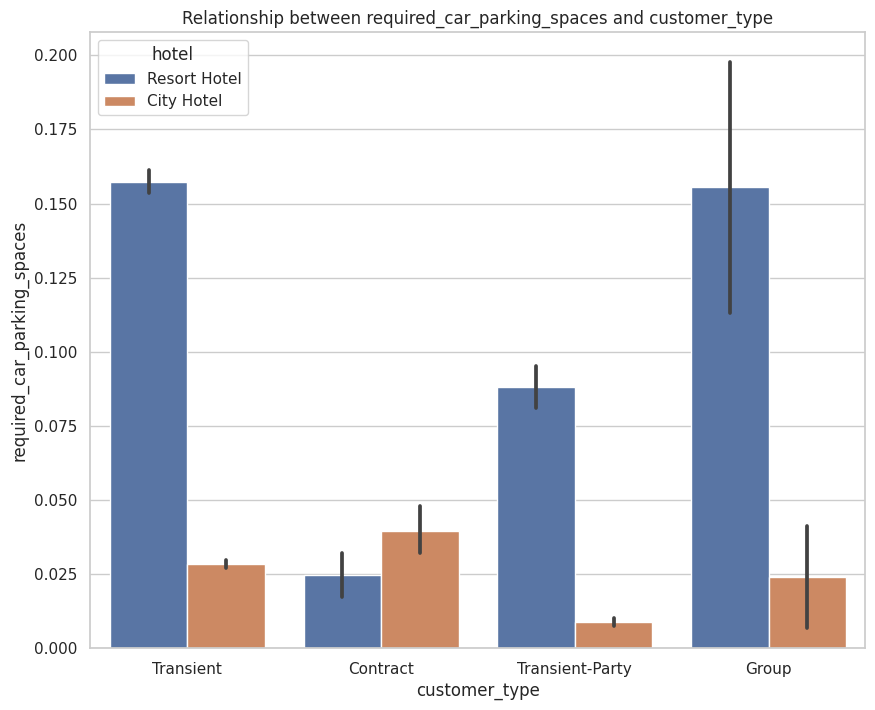

In [60]:
# Relationship between required_car_parking_spaces and customer_type
sns.barplot(data = df_new, x = 'customer_type', y = 'required_car_parking_spaces', hue = 'hotel')
plt.title('Relationship between required_car_parking_spaces and customer_type')

##### 1. Why did you pick the specific chart?

- It is very useful for comparing the values of different categories or groups.

##### 2. What is/are the insight(s) found from the chart?

- We can see that most of Resort hotel customers especially (Transient & Group customers) requires more parking spaces than City hotel customers except (Contract customers) in City hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 15

###Relationship between hotel type and Total_Stay

In [107]:
 df_new['Total_Stay'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']

<Axes: xlabel='hotel', ylabel='Total_Stay'>

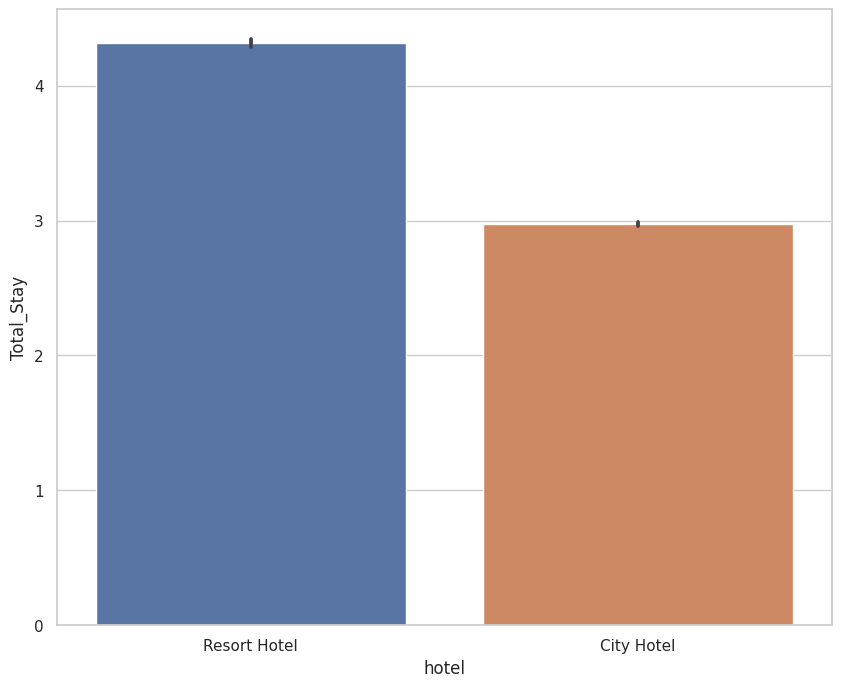

In [110]:
# Relationship between hotel type and Total_Stay
sns.barplot(data = df_new, x = 'hotel', y = 'Total_Stay')

- Total Stay in case of resort hotel is more than city hotel.

#### Chart - 16 - Correlation Heatmap

In [63]:
# Correlation Heatmap visualization code

# import required libraries
import pandas as pd

# generating pairwise correlation
corr = df_new.corr()

# Displaying dataframe as an heatmap
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests,adr_pp,Total_Stay
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,-0.083745,0.110139,-0.057365,0.046492,-0.195701,-0.234877,0.049894,0.017808,0.018554
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,-0.123209,0.086025,-0.073599,-0.065018,-0.116624,-0.095949,0.074024,-0.127237,0.158294
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.010281,-0.119905,0.029234,0.198429,-0.013812,0.108610,0.055290,0.138222,0.031796
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,-0.031125,0.035493,-0.021009,0.076281,0.001980,0.026202,0.024660,0.054603,0.019279
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.006471,-0.027027,-0.000306,0.030291,0.008569,0.003026,0.006757,0.022821,-0.027533
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,-0.086009,-0.012769,-0.042859,0.050670,-0.018520,0.073124,0.102753,-0.039891,0.760666
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,-0.095302,-0.013976,-0.048873,0.066847,-0.024933,0.068738,0.103099,-0.027703,0.940243
is_repeated_guest,-0.083745,-0.123209,0.010281,-0.031125,-0.006471,-0.086009,-0.095302,1.000000,0.082740,0.420642,-0.130807,0.077928,0.012963,-0.132540,-0.033945,-0.104848
previous_cancellations,0.110139,0.086025,-0.119905,0.035493,-0.027027,-0.012769,-0.013976,0.082740,1.000000,0.152570,-0.065974,-0.018540,-0.048488,-0.019647,-0.050141,-0.015437
previous_bookings_not_canceled,-0.057365,-0.073599,0.029234,-0.021009,-0.000306,-0.042859,-0.048873,0.420642,0.152570,1.000000,-0.072335,0.047506,0.037775,-0.100096,0.000740,-0.053279


##### 1. Why did you pick the specific chart?

- Heat Maps are representations of data using color-coded systems. Heat Maps gives us a better understanding to visualize the datapoints which are having high corelations.

##### 2. What is/are the insight(s) found from the chart?

- Highly corelated variables are having colour shades more towards Red (stays_in_week_nights & Total_Stay); Least corelated variables are having colour shades more towards Blue colour (is_repeated_guest & adr). Some moderately corelated variables cane be seen in White color (previous_bookings_not_canceled & is_repeated_guest)

#### Chart - 17 - Pair Plot

In [82]:
# Creating copy of our original dataset
df_new_c = df_new.copy()
# Merge the three columns into a single column named 'merged_column'
df_new_c['Date'] = df_new_c[['arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
df_new_c.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests,adr_pp,Total_Stay,Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,Transient,0.0,0,0,2,0.0,0,1-July-2015


In [83]:
df_new_c_Columns = ['hotel', 'is_canceled', 'lead_time', 'meal', 'country', 'market_segment',
                    'is_repeated_guest', 'reserved_room_type', 'customer_type',
                    'required_car_parking_spaces', 'Total_Guests', 'adr_pp', 'Total_Stay', 'Date']

In [84]:
# Creating copy of our original dataset
df_new_column = df_new_c[df_new_c_Columns].copy()

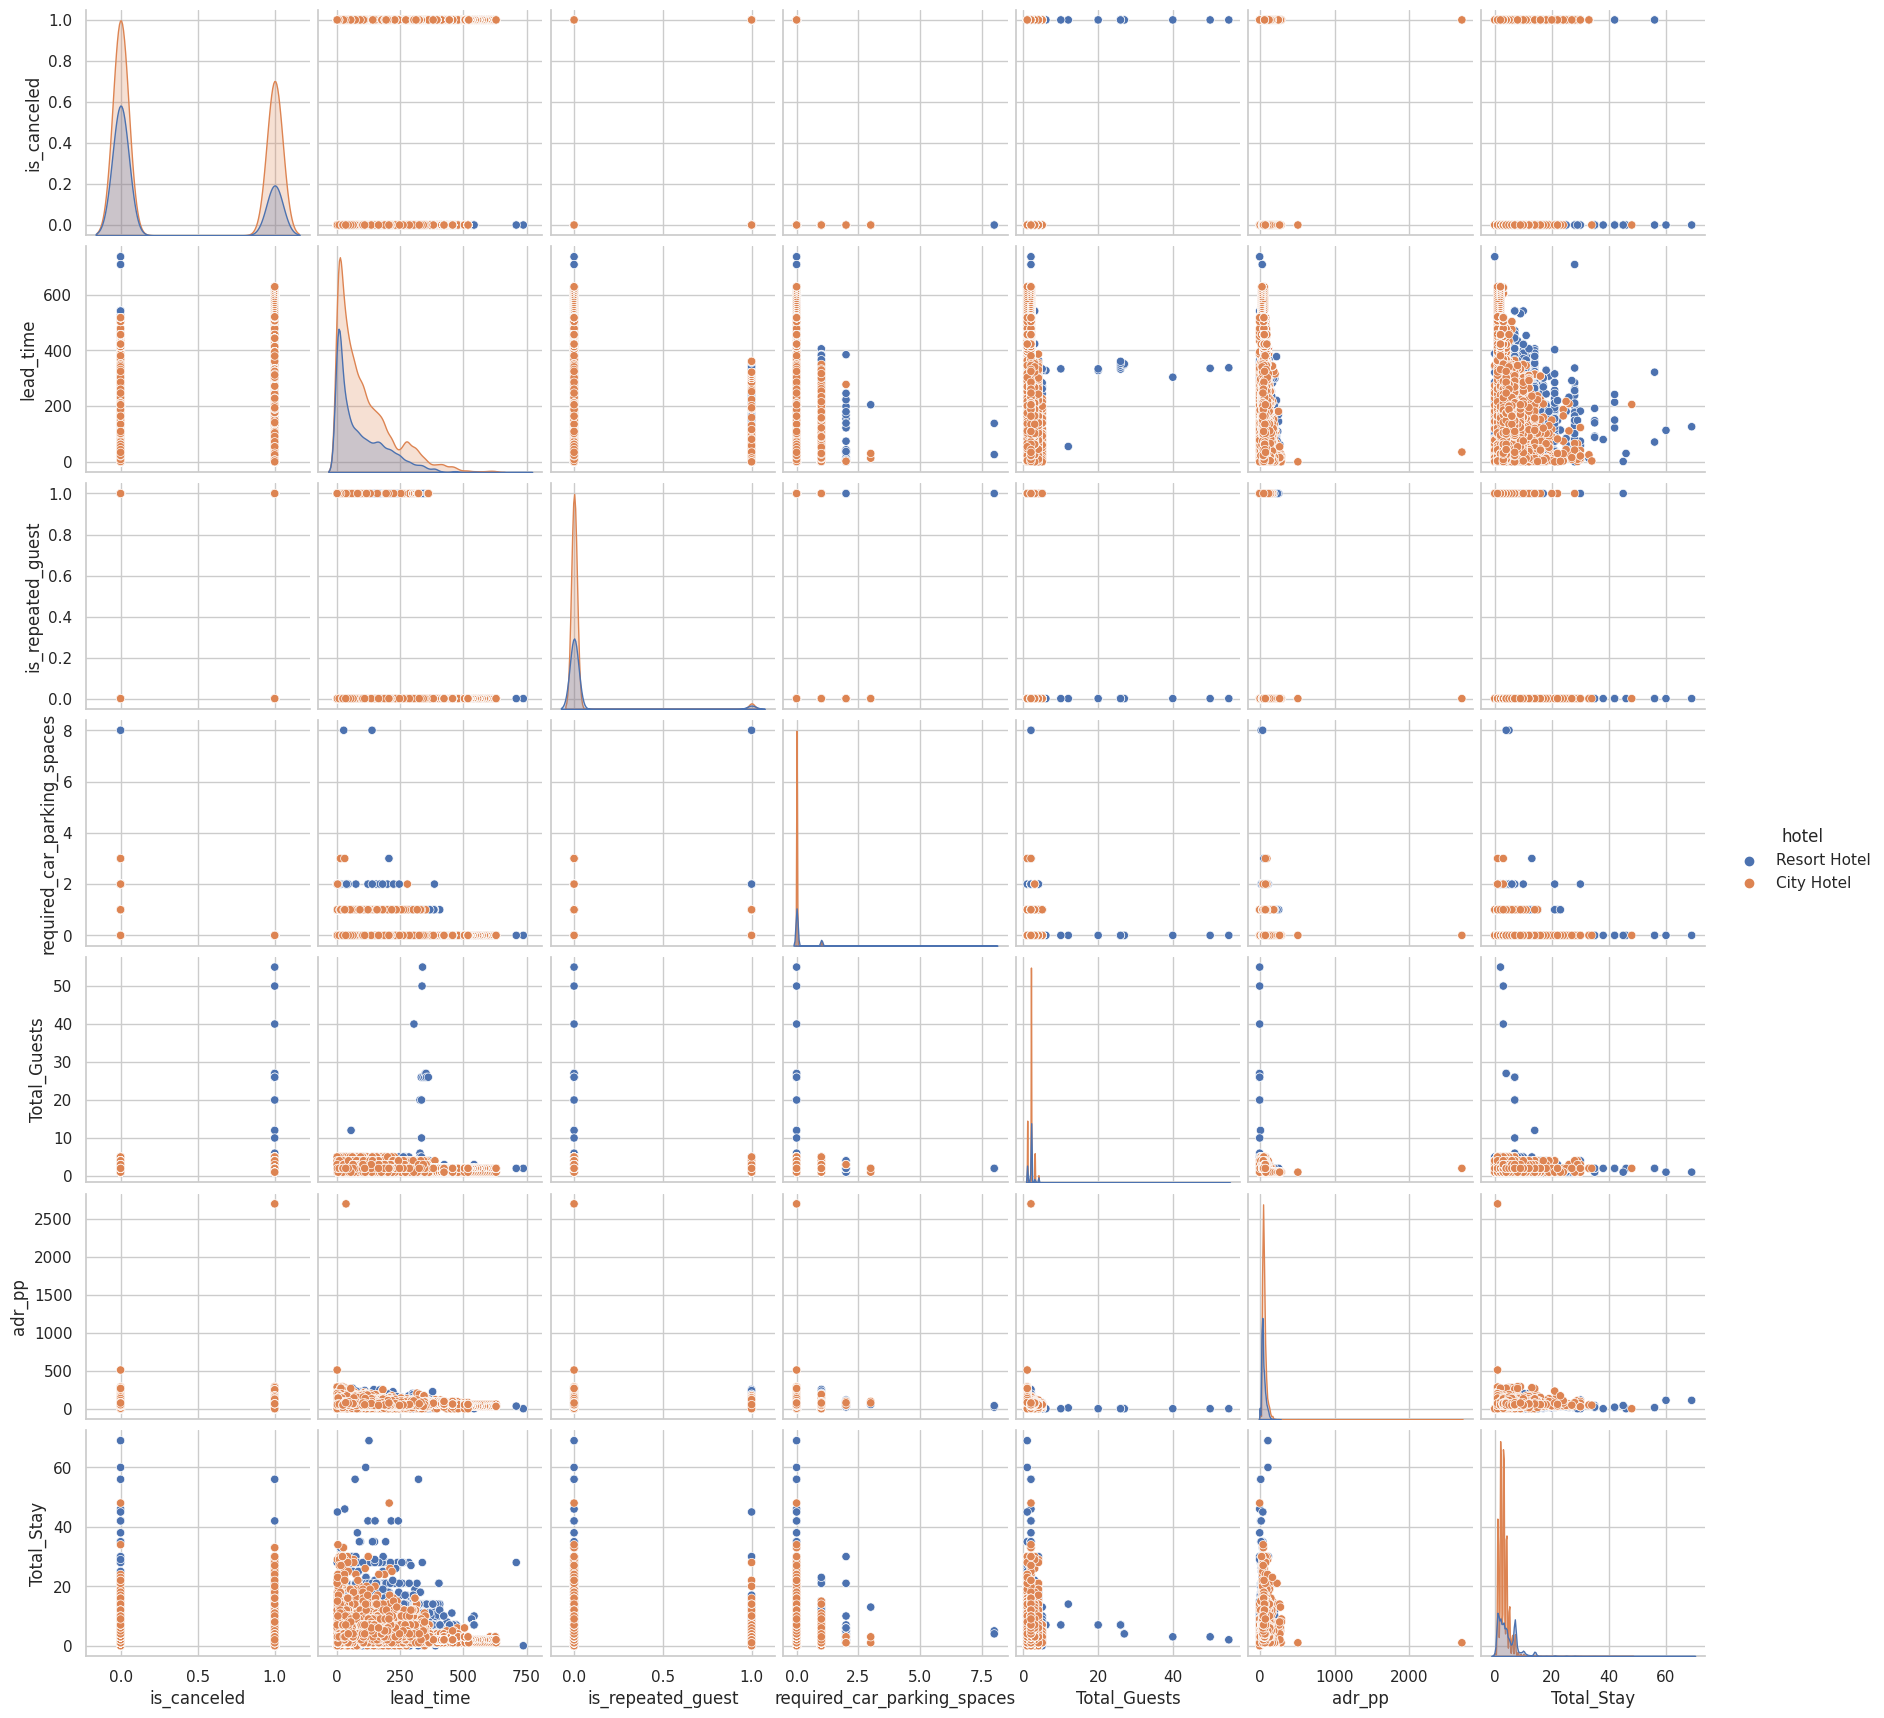

In [85]:
sns.pairplot(df_new_column, hue='hotel')
plt.show()

##### 1. Why did you pick the specific chart?

- Pair plots are really helpful to see both distribution of single variables and relationships between two variables.

##### 2. What is/are the insight(s) found from the chart?

- We can see some relationship between 'hotel' column with columns of 'df_new_column' dataframe along the diagonally presented charts.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

- The Hotel Booking Analysis project provides valuable insights into hotel booking patterns, customer preferences, and revenue optimization strategies. By analyzing the dataset spanning July 2015 to August 2017, this project offers practical recommendations for hotels to enhance their operational efficiency, increase customer satisfaction, and maximize revenue. The findings enable hoteliers and industry stakeholders to make informed decisions and develop effective strategies to stay competitive in the dynamic hotel industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***